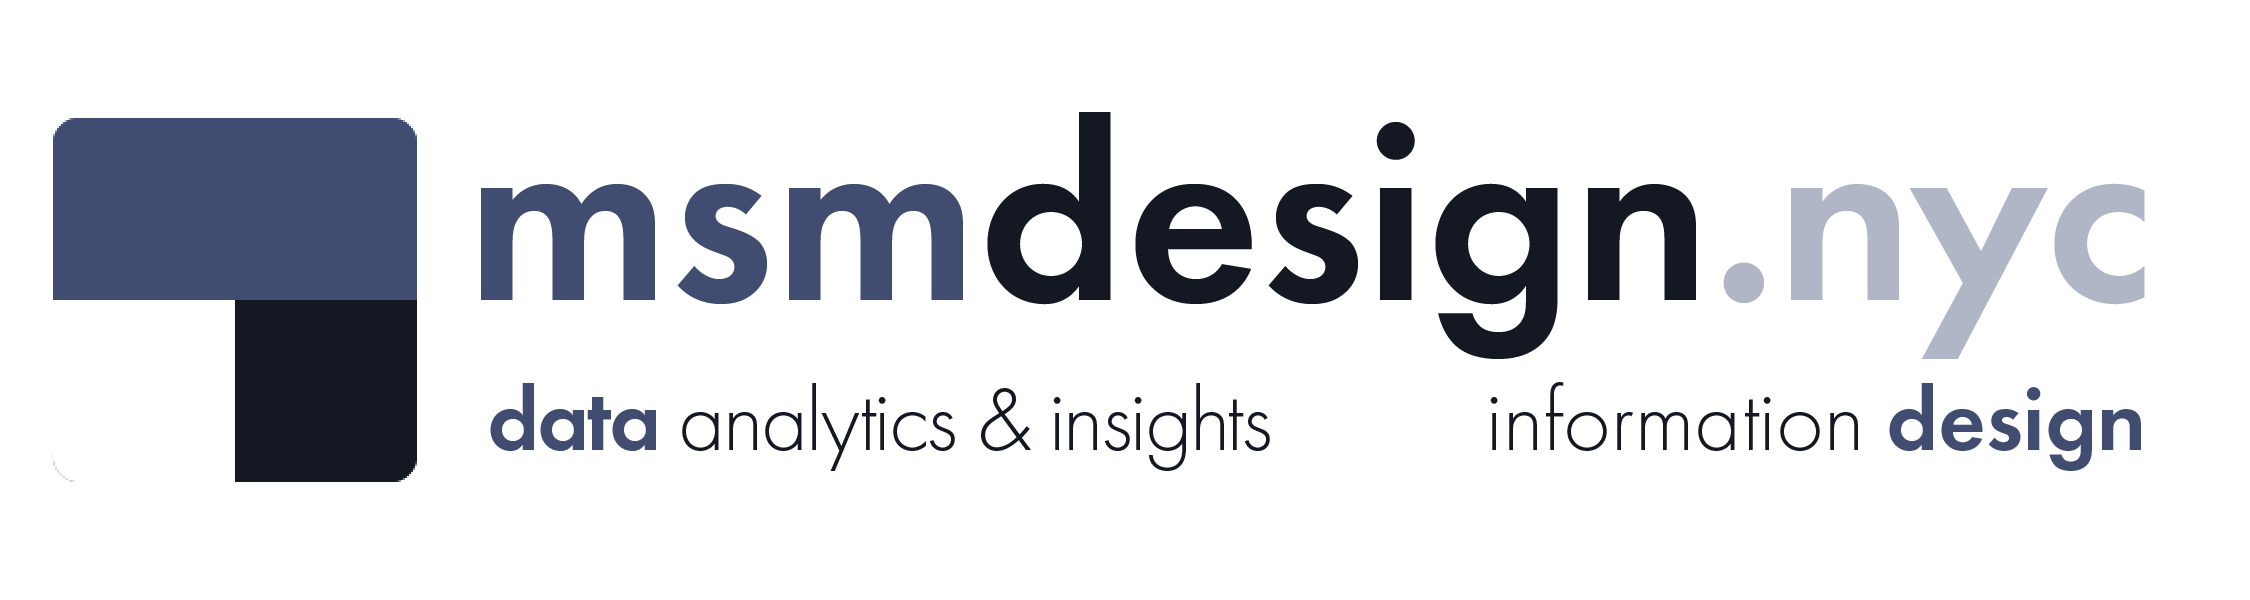

---
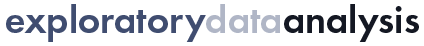

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Film Permits

**Dataset Analyzed:** *Film Permits*

**About This Dataset:** Permits are generally required when asserting the exclusive use of city property, like a sidewalk, a street, or a park. See http://www1.nyc.gov/site/mome/permits/when-permit-required.page Data provided by Mayor’s Office of Media and Entertainment (MOME), the City of New York: https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p



**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-003


**EDA Publication Date:** Tuesday, January 3, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [2]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='afmhot',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [3]:
%%html
<style>
table {float:left}
</style>

### 0.4 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [34]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\all-other-materials\ins-003-2023-01-03\Film_Permits.csv"

permits_temp = pd.read_csv(csv, encoding='utf-8')

In [35]:
# glimpse the first three rows

permits_temp.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,628327,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 07:00:00 PM,02/28/2022 11:13:50 AM,"Mayor's Office of Film, Theatre & Broadcasting",SUTTON STREET between NORMAN AVENUE and NASSAU...,Brooklyn,1,94,Television,Pilot,United States of America,11222
1,629351,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 10:00:00 PM,03/03/2022 02:51:17 PM,"Mayor's Office of Film, Theatre & Broadcasting",COVERT ST between WYCKOFF AVENUE and IRVING AV...,Queens,5,104,Television,Episodic series,United States of America,"11237, 11385"
2,629319,Shooting Permit,03/08/2022 07:00:00 AM,03/08/2022 09:00:00 PM,03/03/2022 01:49:15 PM,"Mayor's Office of Film, Theatre & Broadcasting",WHITE STREET between SEIGEL STREET and MOORE S...,Brooklyn,1,90,Television,Cable-episodic,United States of America,11206


In [36]:
# glimpse the last three rows

permits_temp.tail(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
11858,674614,Shooting Permit,09/30/2022 07:00:00 AM,09/30/2022 09:00:00 PM,09/26/2022 12:52:25 PM,"Mayor's Office of Film, Theatre & Broadcasting",HOE AVENUE between EAST 173 STREET and EAST ...,Bronx,3,42,WEB,Not Applicable,United States of America,10460
11859,575935,Shooting Permit,05/12/2021 09:00:00 AM,05/12/2021 11:00:00 PM,05/06/2021 12:07:03 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 47 STREET between 8 AVENUE and 7 AVENUE...,Manhattan,"4, 5","14, 18",Film,Feature,United States of America,"10018, 10019, 10020, 10036"
11860,674805,Shooting Permit,09/30/2022 07:00:00 AM,09/30/2022 11:00:00 PM,09/27/2022 02:07:22 PM,"Mayor's Office of Film, Theatre & Broadcasting","14 ROAD between 113 STREET and 114 STREET, 14...",Queens,7,109,Television,Episodic series,United States of America,"11354, 11356"


In [38]:
# glimpse ten randomly selected rows

permits_temp.sample(10, random_state=42)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
5957,625657,Shooting Permit,02/14/2022 06:00:00 AM,02/14/2022 09:00:00 PM,02/11/2022 12:36:52 PM,"Mayor's Office of Film, Theatre & Broadcasting",KINGSLAND AVENUE between NORMAN AVENUE and GRE...,Brooklyn,1,94,Television,Episodic series,United States of America,11222
937,640846,Shooting Permit,04/23/2022 06:00:00 AM,04/23/2022 06:00:00 PM,04/19/2022 09:23:36 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 9 STREET between 1 AVENUE and 2 AVENUE...,Manhattan,"12, 3","33, 9",Film,Feature,United States of America,"10003, 10032"
6232,598341,Shooting Permit,08/25/2021 08:00:00 AM,08/25/2021 11:00:00 PM,08/19/2021 12:19:20 PM,"Mayor's Office of Film, Theatre & Broadcasting",CONOVER STREET between SULLIVAN STREET and WOL...,Brooklyn,6,76,WEB,Not Applicable,United States of America,11231
5396,587418,Shooting Permit,06/29/2021 07:00:00 AM,06/29/2021 11:00:00 PM,06/22/2021 08:49:30 AM,"Mayor's Office of Film, Theatre & Broadcasting",GREENPOINT AVENUE between WEST STREET and DEAD...,Brooklyn,1,94,Television,Cable-episodic,United States of America,11222
1941,649087,Shooting Permit,05/24/2022 07:30:00 AM,05/24/2022 09:30:00 PM,05/19/2022 10:48:29 PM,"Mayor's Office of Film, Theatre & Broadcasting",GREENWICH AVENUE between WEST 13 STREET and ...,Manhattan,2,6,Television,Episodic series,United States of America,"10011, 10012, 10014"
9284,627251,Shooting Permit,02/24/2022 07:00:00 AM,02/24/2022 10:00:00 PM,02/22/2022 12:25:39 PM,"Mayor's Office of Film, Theatre & Broadcasting",DIAMOND STREET between CALYER STREET and MESER...,Brooklyn,1,94,Television,Episodic series,United States of America,11222
2948,557138,Shooting Permit,01/21/2021 07:00:00 AM,01/21/2021 09:00:00 PM,01/06/2021 01:22:56 PM,"Mayor's Office of Film, Theatre & Broadcasting",EAGLE STREET between FRANKLIN STREET and WEST ...,Brooklyn,1,94,Television,Episodic series,United States of America,11222
8231,611686,Shooting Permit,11/18/2021 07:00:00 AM,11/18/2021 09:00:00 PM,11/15/2021 07:46:00 PM,"Mayor's Office of Film, Theatre & Broadcasting",RICHARD STREET between VAN DYKE STREET and BEA...,Brooklyn,6,76,Television,Cable-episodic,United States of America,11231
3060,559662,Shooting Permit,01/29/2021 09:00:00 AM,01/30/2021 01:00:00 AM,01/25/2021 12:19:35 PM,"Mayor's Office of Film, Theatre & Broadcasting",CORTLANDT STREET between CHURCH STREET and BRO...,Manhattan,1,1,Television,Cable-episodic,United States of America,"10006, 10007, 10282"
1408,644270,Shooting Permit,05/04/2022 08:00:00 AM,05/04/2022 10:00:00 PM,05/03/2022 11:34:26 AM,"Mayor's Office of Film, Theatre & Broadcasting",PAYSON AVENUE between RIVERSIDE DRIVE and DYCK...,Manhattan,12,34,Music Video,Signed Artist,United States of America,10034


**The data has been loaded and has been read in as expected.**

### 0.5. Check the data type of each column

In [39]:
# display a listing of each of the DataFrame's columns and its data type

permits_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11861 entries, 0 to 11860
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EventID            11861 non-null  int64 
 1   EventType          11861 non-null  object
 2   StartDateTime      11861 non-null  object
 3   EndDateTime        11861 non-null  object
 4   EnteredOn          11861 non-null  object
 5   EventAgency        11861 non-null  object
 6   ParkingHeld        11861 non-null  object
 7   Borough            11861 non-null  object
 8   CommunityBoard(s)  11858 non-null  object
 9   PolicePrecinct(s)  11858 non-null  object
 10  Category           11861 non-null  object
 11  SubCategoryName    11861 non-null  object
 12  Country            11861 non-null  object
 13  ZipCode(s)         11858 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB


**Other than 'EventID', all of the columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.6 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/tg4x-b46p/files/916308c4-c857-40c5-a94d-f0b5aa0748e3?download=true&filename=Data%20Dictionary%20word.docx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [40]:
# cast start, end date, and date entered columns column to datetime data type

permits_temp['StartDateTime'] = pd.to_datetime(permits_temp['StartDateTime'], errors='coerce')
permits_temp['EndDateTime']   = pd.to_datetime(permits_temp['EndDateTime'], errors='coerce')
permits_temp['EnteredOn']     = pd.to_datetime(permits_temp['EnteredOn'], errors='coerce')

In [41]:
# cast appropriate columns to categorical data type

permits_temp['EventType']         = permits_temp['EventType'].astype('category')
permits_temp['EventAgency']       = permits_temp['EventAgency'].astype('category')
permits_temp['Borough']           = permits_temp['Borough'].astype('category')
permits_temp['CommunityBoard(s)'] = permits_temp['CommunityBoard(s)'].astype('category')
permits_temp['PolicePrecinct(s)'] = permits_temp['PolicePrecinct(s)'].astype('category')
permits_temp['Category']          = permits_temp['Category'].astype('category')
permits_temp['SubCategoryName']   = permits_temp['SubCategoryName'].astype('category')
permits_temp['Country']           = permits_temp['Country'].astype('category')
permits_temp['ZipCode(s)']        = permits_temp['ZipCode(s)'].astype('category')

In [42]:
# display the DataFrame info once again to confirm that the data type changes have been made

permits_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11861 entries, 0 to 11860
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EventID            11861 non-null  int64         
 1   EventType          11861 non-null  category      
 2   StartDateTime      11861 non-null  datetime64[ns]
 3   EndDateTime        11861 non-null  datetime64[ns]
 4   EnteredOn          11861 non-null  datetime64[ns]
 5   EventAgency        11861 non-null  category      
 6   ParkingHeld        11861 non-null  object        
 7   Borough            11861 non-null  category      
 8   CommunityBoard(s)  11858 non-null  category      
 9   PolicePrecinct(s)  11858 non-null  category      
 10  Category           11861 non-null  category      
 11  SubCategoryName    11861 non-null  category      
 12  Country            11861 non-null  category      
 13  ZipCode(s)         11858 non-null  category      
dtypes: cat

---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our data set?

In [44]:
# display the number of rows and columns in the DataFrame

rows = permits_temp.shape[0]
columns = permits_temp.shape[1]

print(f'There are {rows} rows and {columns} columns in the data set.')

There are 11861 rows and 14 columns in the data set.


### 1.2 Identify the index of our DataFrame

In [45]:
# display the index of the DataFrame

permits_temp.index

RangeIndex(start=0, stop=11861, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual film permit.

### 1.3 What are the column headings in our dataset?

In [46]:
# display a list of the DataFrame's columns

all_cols = list(permits_temp.columns)
all_cols

['EventID',
 'EventType',
 'StartDateTime',
 'EndDateTime',
 'EnteredOn',
 'EventAgency',
 'ParkingHeld',
 'Borough',
 'CommunityBoard(s)',
 'PolicePrecinct(s)',
 'Category',
 'SubCategoryName',
 'Country',
 'ZipCode(s)']

### 1.4 What are the data types of each column?

In [47]:
# display the data type of each column in the DataFrame

permits_temp.dtypes

EventID                       int64
EventType                  category
StartDateTime        datetime64[ns]
EndDateTime          datetime64[ns]
EnteredOn            datetime64[ns]
EventAgency                category
ParkingHeld                  object
Borough                    category
CommunityBoard(s)          category
PolicePrecinct(s)          category
Category                   category
SubCategoryName            category
Country                    category
ZipCode(s)                 category
dtype: object

### 1.5 How many null values are in each column?

In [48]:
# display the number of missing values in each column of the DataFrame

permits_temp.isna().sum()

EventID              0
EventType            0
StartDateTime        0
EndDateTime          0
EnteredOn            0
EventAgency          0
ParkingHeld          0
Borough              0
CommunityBoard(s)    3
PolicePrecinct(s)    3
Category             0
SubCategoryName      0
Country              0
ZipCode(s)           3
dtype: int64

### 1.6 How many unique values are there in each column?

In [49]:
# display the count of unique elements in each column

permits_temp.nunique(axis=0, dropna=True)

EventID              11861
EventType                4
StartDateTime         4604
EndDateTime           5594
EnteredOn            11694
EventAgency              1
ParkingHeld           7045
Borough                  5
CommunityBoard(s)      352
PolicePrecinct(s)      814
Category                 9
SubCategoryName         27
Country                  3
ZipCode(s)            1436
dtype: int64

---

## **2. Summarize the contents of the dataset**

### 2.1 Summarize the columns containing datetime variables

In [50]:
# summarize the data contained in columns with the 'datetime' data type only

permits_temp.describe(datetime_is_numeric=True) 

,EventID,StartDateTime,EndDateTime,EnteredOn
count,11861.000000,11861,11861,11861
mean,616992.726414,2021-12-11 17:42:39.092825088,2021-12-12 13:11:09.484866560,2021-12-06 02:03:43.722536192
min,552200.000000,2021-01-04 00:01:00,2021-01-04 20:00:00,2020-11-19 10:46:04
25%,592786.000000,2021-07-26 12:00:00,2021-07-27 20:00:00,2021-07-21 13:15:02
50%,614532.000000,2021-12-08 07:00:00,2021-12-09 02:00:00,2021-12-01 13:31:39
75%,646615.000000,2022-05-16 06:00:00,2022-05-17 03:00:00,2022-05-11 11:35:26
max,675540.000000,2022-10-04 12:00:00,2022-10-14 06:00:00,2022-10-03 13:25:13
std,34865.782227,NaN,NaN,NaN


### 2.2 Summarize the columns containing categorical variables

In [51]:
# summarize the data contained in columns with the 'category' data type only

permits_temp.describe(include=['category'])

,EventType,EventAgency,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
count,11861,11861,11861,11858,11858,11861,11861,11861,11858
unique,4,1,5,352,814,9,27,3,1436
top,Shooting Permit,"Mayor's Office of Film, Theatre & Broadcasting",Manhattan,1,94,Television,Episodic series,United States of America,11222
freq,10542,11861,4873,3152,1814,7526,5233,11839,1679


### 2.3 Summarize the columns containing qualitatitive data

In [52]:
# summarize the data contained in columns with the 'object' data type only

permits_temp.describe(include=[object])  

,ParkingHeld
count,11861
unique,7045
top,EAST 11 STREET between 3 AVENUE and 4 AVENUE...
freq,198


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [53]:
# display all columns once again

list(permits_temp.columns)

['EventID',
 'EventType',
 'StartDateTime',
 'EndDateTime',
 'EnteredOn',
 'EventAgency',
 'ParkingHeld',
 'Borough',
 'CommunityBoard(s)',
 'PolicePrecinct(s)',
 'Category',
 'SubCategoryName',
 'Country',
 'ZipCode(s)']

In [70]:
# select a subset of columns to examine
selected_cols = ['EventType',
                 'EnteredOn',
                 'StartDateTime',
                 'EndDateTime',
                 'EventAgency',
                 'Borough',
                 'Category',
                 'SubCategoryName',
                 'Country',
                 'ZipCode(s)']

permits = permits_temp[selected_cols]

In [71]:
# display the size of the new data subset

rows = permits.shape[0]
columns = permits.shape[1]

print(f'There are {rows} rows and {columns} columns in the data subset.')

There are 11861 rows and 10 columns in the data subset.


---

## 4. **Describe and summarize the selected subset of data**

### 4.1 Explore individual Series in the DataFrame

In [72]:
# what is the range of dates that permit requests were submitted?

print(permits['EnteredOn'].min())
print('to')
print(permits['EnteredOn'].max())

2020-11-19 10:46:04
to
2022-10-03 13:25:13


In [60]:
# what is the range of dates that film productions in this data set began?

print(permits['StartDateTime'].min())
print('to')
print(permits['StartDateTime'].max())

2021-01-04 00:01:00
to
2022-10-04 12:00:00


In [61]:
# what is the range of dates that film productions in this data set ended?

print(permits['EndDateTime'].min())
print('to')
print(permits['EndDateTime'].max())

2021-01-04 20:00:00
to
2022-10-14 06:00:00


In [62]:
# what is the distribution of event agencies represented in the data set?

permits['EventAgency'].value_counts()

Mayor's Office of Film, Theatre & Broadcasting    11861
Name: EventAgency, dtype: int64

In [63]:
permits['EventAgency'].value_counts(normalize=True)

Mayor's Office of Film, Theatre & Broadcasting    1.0
Name: EventAgency, dtype: float64

In [64]:
# what is the distribution of NYC boroughs represented in the data set?

permits['Borough'].value_counts()

Manhattan        4873
Brooklyn         4244
Queens           2158
Bronx             484
Staten Island     102
Name: Borough, dtype: int64

In [65]:
permits['Borough'].value_counts(normalize=True)

Manhattan        0.410842
Brooklyn         0.357811
Queens           0.181941
Bronx            0.040806
Staten Island    0.008600
Name: Borough, dtype: float64

In [66]:
# what is the distribution of production categories represented in the data set?

permits['Category'].value_counts()

Television           7526
Film                 1188
Theater              1173
Commercial            861
Still Photography     525
WEB                   450
Documentary            68
Student                37
Music Video            33
Name: Category, dtype: int64

In [67]:
permits['Category'].value_counts(normalize=True)

Television           0.634516
Film                 0.100160
Theater              0.098896
Commercial           0.072591
Still Photography    0.044263
WEB                  0.037939
Documentary          0.005733
Student              0.003119
Music Video          0.002782
Name: Category, dtype: float64

In [68]:
# what is the distribution of production sub-categories represented in the data set?

permits['SubCategoryName'].value_counts()

Episodic series            5233
Cable-episodic             1542
Theater                    1173
Not Applicable             1151
Feature                    1080
Commercial                  720
News                        189
Pilot                       111
Short                       108
Promo                        89
Variety                      89
Special/Awards Show          58
Made for TV/mini-series      54
Cable-other                  49
Industrial/Corporate         34
Student Film                 31
Signed Artist                29
Children                     25
Talk Show                    22
Reality                      20
PSA                          18
Morning Show                 12
Game show                    12
Cable-daily                   6
Daytime soap                  3
Independent Artist            2
Magazine Show                 1
Name: SubCategoryName, dtype: int64

In [69]:
permits['SubCategoryName'].value_counts(normalize=True)

Episodic series            0.441194
Cable-episodic             0.130006
Theater                    0.098896
Not Applicable             0.097041
Feature                    0.091055
Commercial                 0.060703
News                       0.015935
Pilot                      0.009358
Short                      0.009105
Promo                      0.007504
Variety                    0.007504
Special/Awards Show        0.004890
Made for TV/mini-series    0.004553
Cable-other                0.004131
Industrial/Corporate       0.002867
Student Film               0.002614
Signed Artist              0.002445
Children                   0.002108
Talk Show                  0.001855
Reality                    0.001686
PSA                        0.001518
Morning Show               0.001012
Game show                  0.001012
Cable-daily                0.000506
Daytime soap               0.000253
Independent Artist         0.000169
Magazine Show              0.000084
Name: SubCategoryName, dtype

### 4.2 Explore the data set using groupby

In [77]:
# how many productions began filming in each of the last two years?

permits.groupby(permits['StartDateTime'].dt.year)['StartDateTime'].count()

StartDateTime
2021    6207
2022    5654
Name: StartDateTime, dtype: int64

In [76]:
# by catergory, how many productions began filming in each of the last two years?

permits.groupby([permits['StartDateTime'].dt.year,permits['Category']])['StartDateTime'].count()

StartDateTime  Category         
2021           Commercial            455
               Documentary            54
               Film                  641
               Music Video            21
               Still Photography     270
               Student                17
               Television           4075
               Theater               404
               WEB                   270
2022           Commercial            406
               Documentary            14
               Film                  547
               Music Video            12
               Still Photography     255
               Student                20
               Television           3451
               Theater               769
               WEB                   180
Name: StartDateTime, dtype: int64

### 4.3 Explore the data set using crosstabs

In [80]:
# find counts at the intersection of two categories AND add show total by row and column

pd.crosstab(permits['SubCategoryName'], permits['Category'], margins=True, margins_name="Total")

Category,Commercial,Documentary,Film,Music Video,Still Photography,Student,Television,Theater,WEB,Total
SubCategoryName,,,,,,,,,,
Cable-daily,0,0,0,0,0,0,6,0,0,6
Cable-episodic,0,0,0,0,0,0,1542,0,0,1542
Cable-other,0,0,0,0,0,0,49,0,0,49
Children,0,0,0,0,0,0,25,0,0,25
Commercial,720,0,0,0,0,0,0,0,0,720
Daytime soap,0,0,0,0,0,0,3,0,0,3
Episodic series,0,0,0,0,0,0,5233,0,0,5233
Feature,0,0,1080,0,0,0,0,0,0,1080
Game show,0,0,0,0,0,0,12,0,0,12


In [81]:
# find the percentage of how often each combination of two categories occur (across the entire table)

pd.crosstab(permits['SubCategoryName'], permits['Category'], margins=True, margins_name="Total", normalize=True)

Category,Commercial,Documentary,Film,Music Video,Still Photography,Student,Television,Theater,WEB,Total
SubCategoryName,,,,,,,,,,
Cable-daily,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000506,0.000000,0.000000,0.000506
Cable-episodic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130006,0.000000,0.000000,0.130006
Cable-other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004131,0.000000,0.000000,0.004131
Children,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002108,0.000000,0.000000,0.002108
Commercial,0.060703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060703
Daytime soap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000253,0.000000,0.000000,0.000253
Episodic series,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.441194,0.000000,0.000000,0.441194
Feature,0.000000,0.000000,0.091055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091055
Game show,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001012,0.000000,0.000000,0.001012


---

## **5. Next steps**

In [85]:
# export data for data graphic creation

permits_data = permits.groupby([permits['StartDateTime'].dt.year,permits['Category']])['StartDateTime'].count()

In [86]:
permits_data.to_csv('permits_data.csv')

In [87]:
permits_data

StartDateTime  Category         
2021           Commercial            455
               Documentary            54
               Film                  641
               Music Video            21
               Still Photography     270
               Student                17
               Television           4075
               Theater               404
               WEB                   270
2022           Commercial            406
               Documentary            14
               Film                  547
               Music Video            12
               Still Photography     255
               Student                20
               Television           3451
               Theater               769
               WEB                   180
Name: StartDateTime, dtype: int64

***

---